In [1]:
from google.colab import files

print(f"{'*'*27}\n* Upload Kaggle.json file *\n{'*'*27}")
kaggle_json = files.upload()

***************************
* Upload Kaggle.json file *
***************************


Saving kaggle.json to kaggle.json


In [4]:
%%capture
!pip install opendatasets

In [3]:
import opendatasets as od

dataset_url = 'https://www.kaggle.com/datasets/chrisfilo/urbansound8k'
od.download(dataset_url)

100%|██████████| 5.61G/5.61G [01:04<00:00, 93.5MB/s]


In [5]:
%%capture
!pip install librosa

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

import IPython.display as ipd
import librosa
import librosa.display
import glob
import pandas as pd

In [12]:
all_audio_files = glob.glob("/content/urbansound8k/*/*.wav")
print(f"Total Audio Files: {len(all_audio_files)}")
print(f"Sampel file: {all_audio_files[0]}")

Total Audio Files: 8732
Sampel file: /content/urbansound8k/fold8/55013-3-0-1.wav


In [20]:
filename = all_audio_files[0]
data, sample_rate=librosa.load(filename)
print(f"data shape: {data.shape}\ndata sample: {data[:3]}...")
print(f"sample rate: {sample_rate}")
ipd.Audio(filename)

data shape: (88200,)
data sample: [0.00230569 0.00319139 0.00233925]...
sample rate: 22050


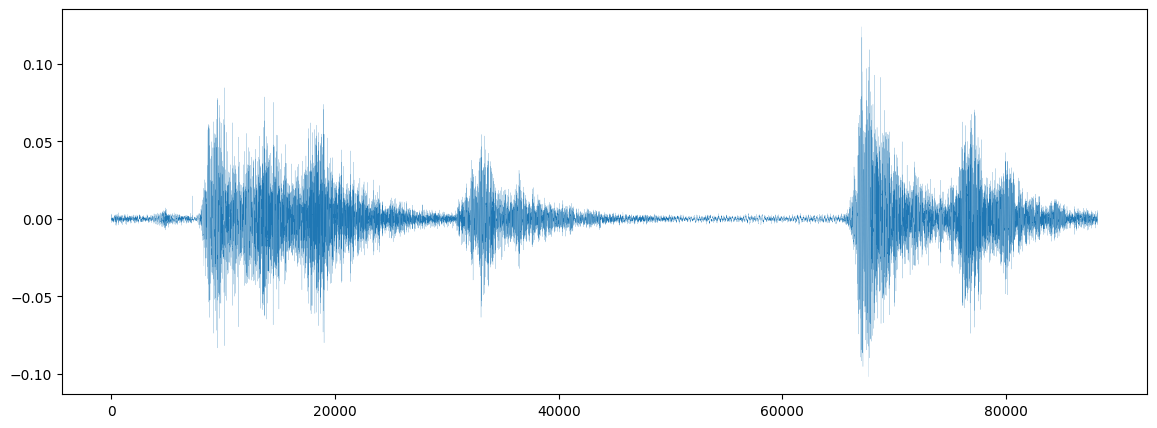

In [25]:
pd.Series(data).plot(figsize=(14,5), lw=0.1)
plt.show()

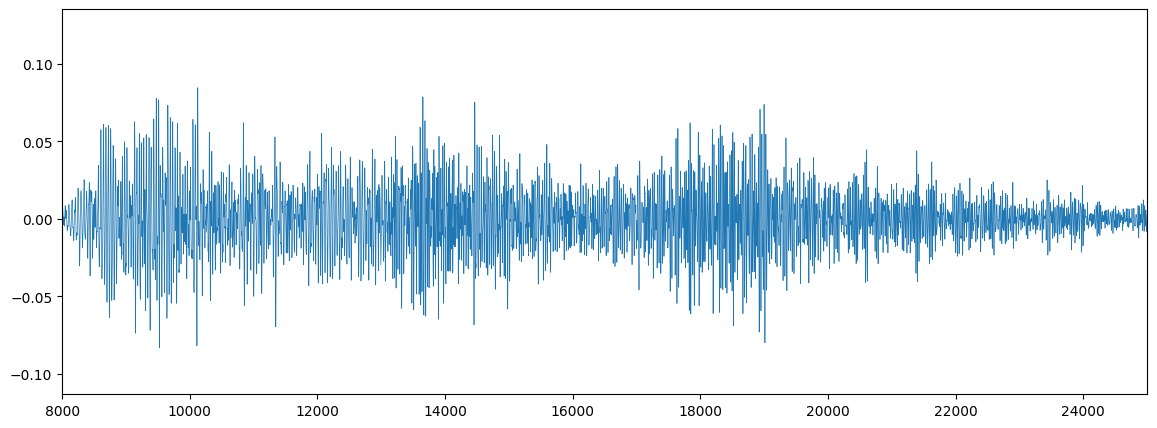

In [32]:
pd.Series(data).plot(figsize=(14,5), lw=0.5)
plt.xlim(8000, 25000)
plt.show()

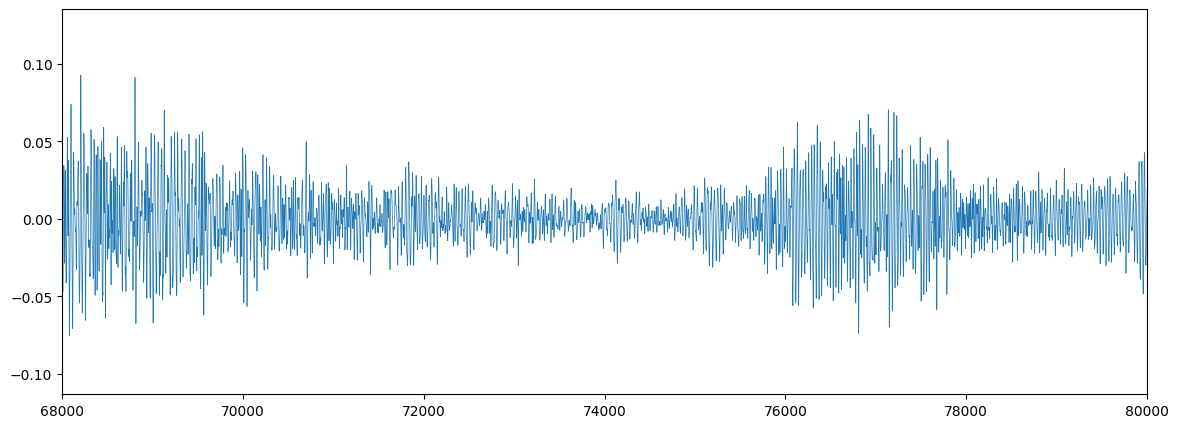

In [31]:
pd.Series(data).plot(figsize=(14,5), lw=0.5)
plt.xlim(68000, 80000)
plt.show()

In [38]:
metadata = pd.read_csv('/content/urbansound8k/UrbanSound8K.csv')
metadata.sample(5)

,slice_file_name,fsID,start,end,salience,fold,classID,class
2652,159742-8-0-6.wav,159742,3.129945,7.129945,2,10,8,siren
8009,77751-7-4-0.wav,77751,28.064857,32.064857,1,7,7,jackhammer
4053,17853-5-0-0.wav,17853,15.323533,19.323533,1,3,5,engine_idling
1243,130030-3-0-0.wav,130030,0.000000,2.594667,1,1,3,dog_bark
5272,203424-9-0-26.wav,203424,13.000000,17.000000,1,10,9,street_music


In [39]:
### Check whether the dataset is imbalanced
metadata['class'].value_counts()

dog_bark            1000
children_playing    1000
air_conditioner     1000
street_music        1000
engine_idling       1000
jackhammer          1000
drilling            1000
siren                929
car_horn             429
gun_shot             374
Name: class, dtype: int64